In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
fruits = pd.read_table("fruit_data_with_colors.txt")

In [5]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [6]:
fruits.shape

(59, 7)

In [7]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

# Create train-test split

In [36]:
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create classifier object

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)

In [10]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

# Estimate the accuracy of the classifier on future data, using the test data

In [11]:
knn.score(X_test, y_test)

0.6

In [12]:
y_pred = knn.predict(X_test)

In [13]:
print "Predicted labels: ", list(y_pred)
print "Ground truth:     ", list(y_test)

Predicted labels:  [3, 1, 4, 3, 1, 1, 3, 3, 3, 3, 2, 3, 3, 1, 1]
Ground truth:      [3, 3, 4, 3, 1, 1, 3, 4, 3, 1, 2, 1, 3, 3, 3]


In [14]:
from sklearn.metrics import accuracy_score
print "Accuracy of kNN: %.2f %%" %(100*accuracy_score(y_test, y_pred))

Accuracy of kNN: 60.00 %


# Tuning

In [15]:
#major voting
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    print "%sNN: score is %s" % (i, knn.score(X_test, y_test))

1NN: score is 0.6
2NN: score is 0.5333333333333333
3NN: score is 0.5333333333333333
4NN: score is 0.5333333333333333
5NN: score is 0.5333333333333333
6NN: score is 0.5333333333333333
7NN: score is 0.5333333333333333
8NN: score is 0.4666666666666667
9NN: score is 0.5333333333333333


In [16]:
# weights
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors = i, weights = 'distance')
    knn.fit(X_train, y_train)
    print "%sNN: score is %s" % (i, knn.score(X_test, y_test))

1NN: score is 0.6
2NN: score is 0.6
3NN: score is 0.6666666666666666
4NN: score is 0.7333333333333333
5NN: score is 0.6
6NN: score is 0.6
7NN: score is 0.6666666666666666
8NN: score is 0.6666666666666666
9NN: score is 0.6666666666666666


In [39]:
# normalize
X.head()

,mass,width,height
0,192,8.4,7.3
1,180,8.0,6.8
2,176,7.4,7.2
3,86,6.2,4.7
4,84,6.0,4.6


In [18]:
from sklearn.preprocessing import normalize

In [26]:
X2 = normalize(X, axis=0)
X_train, X_test, y_train, y_test = train_test_split(X2, y, random_state=0)

In [27]:
X2[0:10]

array([[0.14532849, 0.15292557, 0.12167698],
       [0.13624546, 0.1456434 , 0.11334294],
       [0.13321778, 0.13472015, 0.12001017],
       [0.06509505, 0.11287364, 0.07833997],
       [0.06358121, 0.10923255, 0.07667316],
       [0.06055354, 0.10559147, 0.07167274],
       [0.06055354, 0.10741201, 0.07167274],
       [0.05752586, 0.10559147, 0.06667232],
       [0.13473162, 0.12925852, 0.13001102],
       [0.1301901 , 0.13472015, 0.11667655]])

In [29]:
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors = i, weights = 'distance')
    knn.fit(X_train, y_train)
    print "%sNN: score is %s" % (i, knn.score(X_test, y_test))

1NN: score is 0.6666666666666666
2NN: score is 0.6666666666666666
3NN: score is 0.6666666666666666
4NN: score is 0.6666666666666666
5NN: score is 0.6666666666666666
6NN: score is 0.6666666666666666
7NN: score is 0.7333333333333333
8NN: score is 0.7333333333333333
9NN: score is 0.7333333333333333


In [35]:
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy
from sklearn import neighbors
import matplotlib.patches as mpatches
from sklearn.tree import export_graphviz
import matplotlib.patches as mpatches

def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].as_matrix()
    y_mat = y.as_matrix()

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, mesh_step_size),
                         numpy.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(numpy.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])

        
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    
    plt.show()

<IPython.core.display.Javascript object>


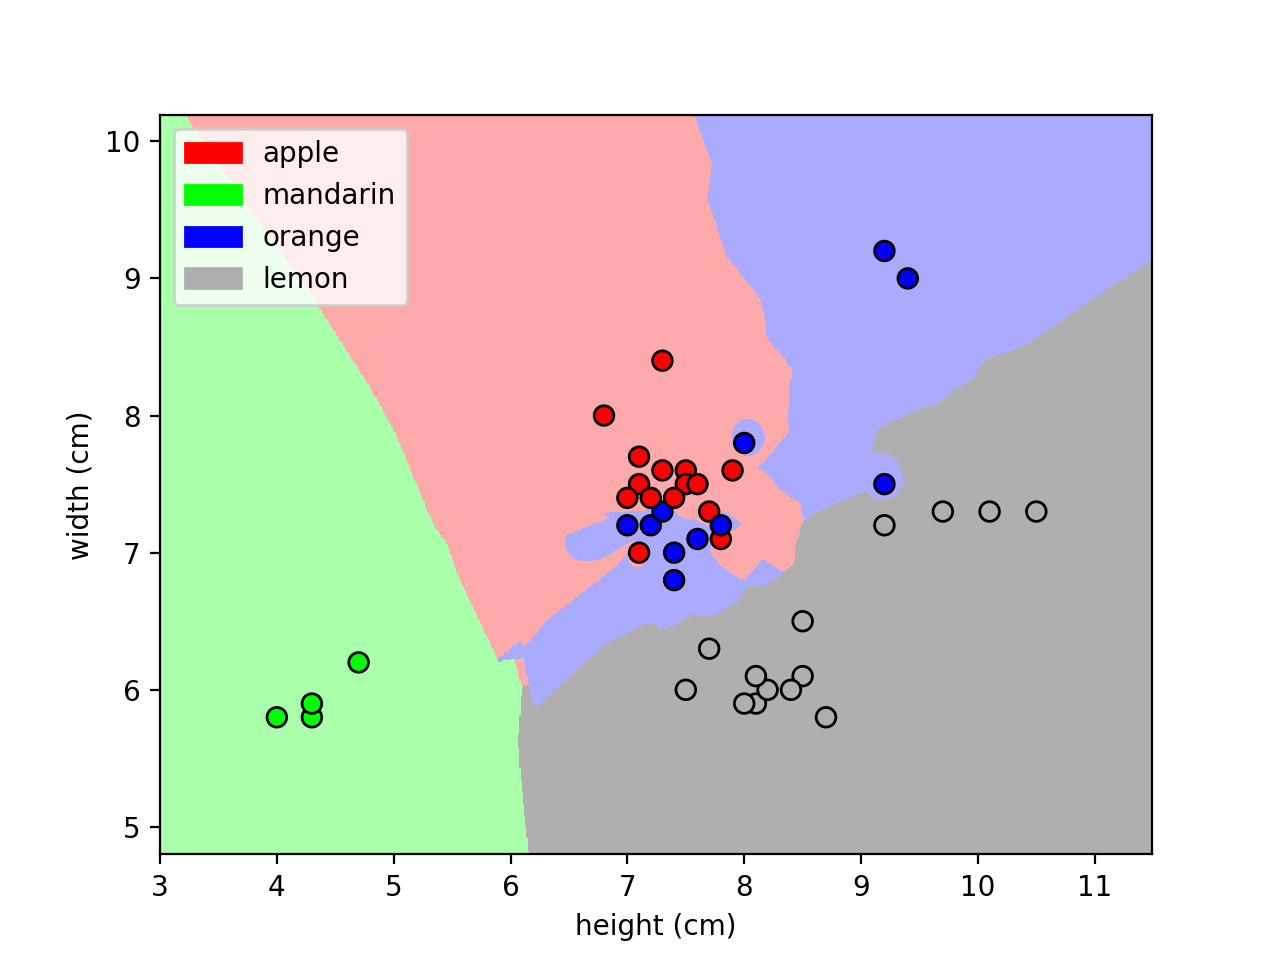

In [38]:
plot_fruit_knn(X_train, y_train, 4, 'distance')

In [ ]:
# Add color_score feature

In [30]:
X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [32]:
X2 = normalize(X, axis=0)
X_train, X_test, y_train, y_test = train_test_split(X2, y, random_state=0)

In [33]:
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors = i, weights = 'distance')
    knn.fit(X_train, y_train)
    print "%sNN: score is %s" % (i, knn.score(X_test, y_test))

1NN: score is 0.8666666666666667
2NN: score is 0.8666666666666667
3NN: score is 0.8666666666666667
4NN: score is 0.9333333333333333
5NN: score is 0.8666666666666667
6NN: score is 0.9333333333333333
7NN: score is 0.9333333333333333
8NN: score is 0.9333333333333333
9NN: score is 0.9333333333333333
